In [1]:
import os
import torch
import torch.nn as nn
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [103]:
t = torchvision.transforms.Compose([
#     torchvision.transforms.Resize(280),
    
# #     torchvision.transforms.RandomCrop((224, 224))
    
#     torchvision.transforms.RandomResizedCrop((224, 224), scale=(0.6, 1.0), ratio=(3. / 4., 4. / 3.)),
#     torchvision.transforms.RandomHorizontalFlip(),
    
    torchvision.transforms.Resize(280),
    torchvision.transforms.CenterCrop(280),
    torchvision.transforms.ToTensor(),
    
#     torchvision.transforms.RandomResizedCrop((224, 224), scale=(0.6, 1.0), ratio=(3. / 4., 4. / 3.)),
])



In [106]:
x = t(image)
print(x.shape)
print(x.min(), x.max())

torch.Size([3, 280, 280])
tensor(0.) tensor(0.9922)


In [99]:
image = Image.open(os.path.expanduser('~/Downloads/fish.jpg'))
print(image.size)

(720, 620)


(280, 280)


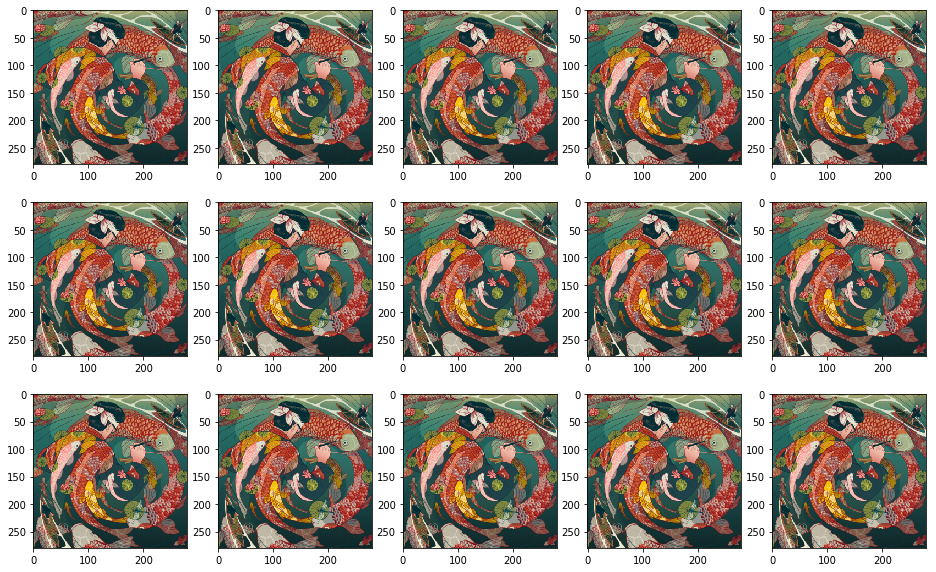

In [100]:
plt.figure(figsize=(16, 10))

print(t(image).size)

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(t(image))
    
plt.show()

In [75]:
t = torchvision.transforms.FiveCrop((512, 512))

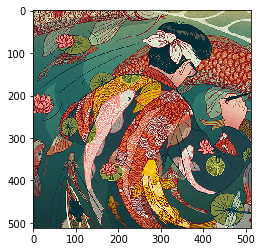

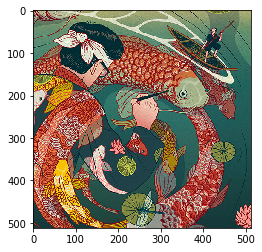

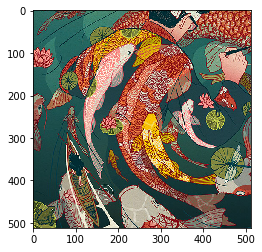

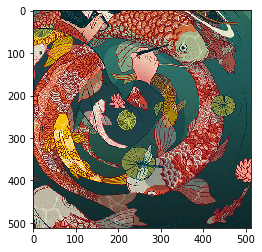

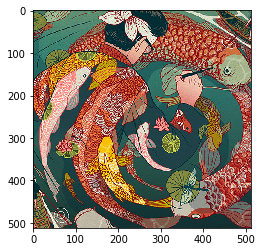

In [76]:
for i in t(image):
    plt.imshow(i)
    plt.show()

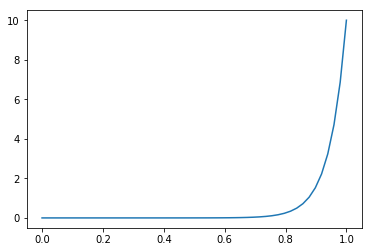

In [118]:
start = 1e-7
end = 10

x = np.linspace(0, 1)
y = start * (end/start) ** x
    
plt.plot(x, y)

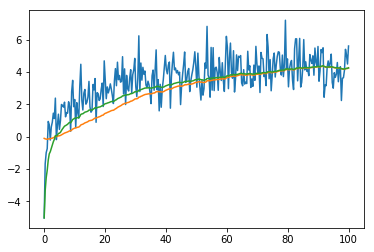

In [151]:
class SmoothenValue():
    "Create a smooth moving average for a value (loss, etc) using `beta`."
    def __init__(self, beta:float):
        self.beta,self.n,self.mov_avg = beta,0,0

    def add_value(self, val:float)->None:
        "Add `val` to calculate updated smoothed value."
        self.n += 1
        self.mov_avg = self.beta * self.mov_avg + (1 - self.beta) * val
        self.smooth = self.mov_avg / (1 - self.beta ** self.n)

x = np.linspace(0.01, 100, 300)
y = np.log(x) + np.random.standard_normal(x.shape)

beta = 0.98
avs = []
sms = []

av = 0
for i, v in enumerate(y, 1):
    av = beta * av + (1 - beta) * v
    sm = av / (1 - beta**i)
    
    avs.append(av)
    sms.append(sm)

plt.plot(x, y)
plt.plot(x, avs)
plt.plot(x, sms)

In [17]:
x = np.arange(300)
min = 1e-7
max = 10

p = (max / min)**(1/300)

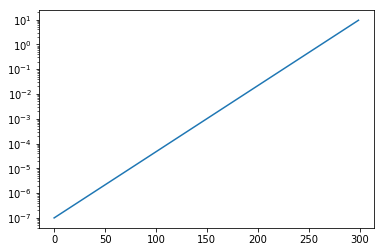

In [20]:
plt.plot(x, 1e-7 * p**x)
plt.yscale('log')

In [44]:
class OneCycleScheduler(object):
    def __init__(self, optimizer, lr, beta, max_steps):
        self.optimizer = optimizer
        self.lr = lr
        self.beta = beta
        self.max_steps = max_steps
        self.epoch = -1
    
    def step(self):
        self.epoch += 1
        
        mid = round(self.max_steps * 0.3)
        if self.epoch < mid:
            r = self.epoch / mid
            lr = annealing_cos(self.lr[0], self.lr[1], r)
            beta = annealing_cos(self.beta[0], self.beta[1], r)
        else:
            r = (self.epoch - mid) / (self.max_steps - mid)
            lr = annealing_cos(self.lr[1], self.lr[0] / 1e4, r)
            beta = annealing_cos(self.beta[1], self.beta[0], r)

        for param_group in self.optimizer.param_groups:
            param_group['lr'] = lr
            param_group['betas'] = (beta, *param_group['betas'][1:])

def annealing_cos(start, end, r):
    cos_out = np.cos(np.pi * r) + 1
    return end + (start - end) / 2 * cos_out            
            
model = nn.Linear(1, 1)
# optimizer = torch.optim.Adam(model.parameters())
optimizer = torch.optim.SGD(model.parameters(), 1e-3)
scheduler = OneCycleScheduler(optimizer, lr=(1e-3 / 25, 1e-3), beta=(0.95, 0.85), max_steps=100)
print(optimizer.param_groups)


#  div_factor*


lrs = []
bts = []

for _ in range(100):
    scheduler.step()
    lrs.append(np.squeeze([pg['lr'] for pg in optimizer.param_groups]))
    bts.append(np.squeeze([pg['betas'][0] for pg in optimizer.param_groups]))
  
for x in [lrs, bts]:
    print('first: {}, last: {}, min: {}, max: {}'.format(x[0], x[1], np.min(x), np.max(x)))

plt.plot(lrs)
plt.show()
plt.plot(bts)
plt.show()

[{'params': [Parameter containing:
tensor([[-0.3130]], requires_grad=True), Parameter containing:
tensor([0.7956], requires_grad=True)], 'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


KeyError: 'betas'